# KNN

Four steps of KNN:
1. Computes the distance between the new data point with every training example.
2. For computing the distance measures such as Euclidean distance, Hamming distance or Manhattan distance will be used.
3. Model picks K entries in the database which are closest to the new data point.
4. Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.


### Task
Our task is to build a KNN model which classifies the new species based on the sepal and petal measurements. Iris dataset is available in scikit-learn and we can make use of it build our KNN.


 https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75


## Step1: Import the Dataset

In [11]:
import pandas as pd
from sklearn.datasets import load_iris


iris = load_iris()
print("data type: {}".format(type(iris)))
print("feature_names: {}".format(iris.feature_names))
print("target[0]: {}, \ntarget[1]: {}, \ntarget[2]: {}".format(iris.target_names[0], iris.target_names[1], iris.target_names[2]))
print(iris.target)
print(iris.data.shape)

data type: <class 'sklearn.utils.Bunch'>
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target[0]: setosa, 
target[1]: versicolor, 
target[2]: virginica
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


## Step2: Split the data and Train the Model 

In [14]:
from sklearn.model_selection import train_test_split

x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [17]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test)

(120, 4)
(120,)
(30, 4)
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# K is our tuning parameter/hyper parameter that needs to be 
# calculated experimentally
k = range(1, 26, 1)
scores = {}
scores_list = []
for n_neighbords in k:
    knn = KNeighborsClassifier(n_neighbors=n_neighbords)
    knn.fit(X=x_train, y=y_train)
    y_pred = knn.predict(x_test)
    
    scores[n_neighbords] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    scores_list.append(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
    
print(scores)


{1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.9666666666666667, 4: 0.9666666666666667, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 0.9666666666666667, 8: 0.9666666666666667, 9: 0.9666666666666667, 10: 0.9666666666666667, 11: 0.9666666666666667, 12: 0.9666666666666667, 13: 0.9666666666666667, 14: 0.9666666666666667, 15: 0.9666666666666667, 16: 0.9666666666666667, 17: 0.9666666666666667, 18: 0.9666666666666667, 19: 0.9666666666666667, 20: 0.9333333333333333, 21: 0.9666666666666667, 22: 0.9333333333333333, 23: 0.9666666666666667, 24: 0.9666666666666667, 25: 0.9666666666666667}


Text(0, 0.5, 'Testing Accuracy')

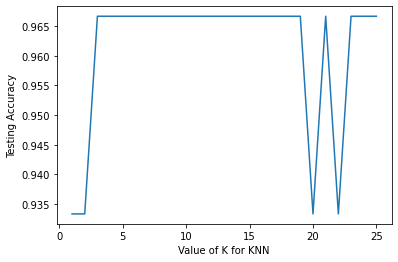

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

### choosing a value for k
For our final model we can choose a value of K as 5 (which falls between 3 and 19). 
Next, we repeat the training process with new value of k.

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

In [30]:
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}